### Data Pre-Processing

In [1]:
import pandas as pd

In [2]:
loanStats = pd.read_csv('LoanStats_2016Q4.csv', skiprows = 1)
rejectStats = pd.read_csv('RejectStats_2016Q4.csv', skiprows = 1)

C:\Users\Enqing\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(loanStats.shape)
print(loanStats.columns)

(103548, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [4]:
print(rejectStats.shape)
print(rejectStats.columns)

(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [5]:
loanStats[-3:]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
103545,NaN,NaN,14000.0,14000.0,14000.0,60 months,14.49%,329.33,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
103546,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103547,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop last two rows

In [6]:
loanStats = loanStats.drop(loanStats.index[-2:])

Drop first two columns since they are empty

In [7]:
loanStats = loanStats.drop(['id', 'member_id'], axis = 1)

In [8]:
print(loanStats.shape)
print(loanStats.columns)
print(rejectStats.shape)
print(rejectStats.columns)

(103546, 142)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=142)
(1404490, 9)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [9]:
print(loanStats['loan_amnt'].describe())
print(rejectStats['Amount Requested'].describe())

count    103546.000000
mean      14151.435835
std        9215.032376
min        1000.000000
25%        7000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    1.404490e+06
mean     1.293313e+04
std      1.567272e+04
min      0.000000e+00
25%      4.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      3.000000e+05
Name: Amount Requested, dtype: float64


In [10]:
print(loanStats['title'].value_counts())
print(rejectStats['Loan Title'].value_counts())

Debt consolidation         59749
Credit card refinancing    20528
Home improvement            7393
Other                       7383
Major purchase              2470
Medical expenses            1468
Business                    1216
Car financing               1162
Vacation                     829
Moving and relocation        772
Home buying                  475
Green loan                    97
Name: title, dtype: int64
debt_consolidation         359782
Debt consolidation         324415
other                      146389
credit_card                 96179
Other                       71882
Credit card refinancing     67381
home_improvement            44136
Home improvement            31054
car                         29480
major_purchase              29301
Car financing               22788
moving                      20836
medical                     20814
Medical expenses            19315
Business Loan               18575
Moving and relocation       17616
Major purchase              17505


There are only 9 columns in reject data, let's try to match loan data with reject data:<br/>
* 'loan_amnt' in loanStats should match with 'Amount Requested' in rejectStats.
* 'issue_d' in loanStats is the issue date, it should be later than 'Application Date' in rejectStats, let's ignore this pair for now.
* 'title' in loanStats should match with 'Loan Title' in rejectStats. However, we need to deal with upper/lower case and space/underscore issues.
* There is no column in loanStats matches with 'Risk_Score' in rejectStats, would be very useful if there was one.
* 'dti' in loanStats matches with 'Debt-To-Income Ratio' in rejectStats.
* 'zip_code' and 'addr_state' in loanStats match with 'Zip Code' and 'State' in rejectStats respectively. Zip codes are only available in first 3 digits, and we might need to get external data for the demographics about the zip code.
* 'emp_length' in loanStats matches with 'Employment Length' in rejectStats.
* 'policy_code' in loanStats matches with 'Policy Code' in rejectStats.

In [11]:
print(loanStats['emp_length'].value_counts())
print(rejectStats['Employment Length'].value_counts())

10+ years    35981
2 years       9652
3 years       8244
< 1 year      7591
1 year        6707
5 years       6292
4 years       6249
6 years       4786
8 years       3951
9 years       3870
7 years       3346
Name: emp_length, dtype: int64
< 1 year     1022412
5 years       274322
10+ years      16782
2 years         5248
3 years         4502
1 year          4389
4 years         3314
6 years         2494
8 years         1953
7 years         1918
9 years         1586
Name: Employment Length, dtype: int64


In [12]:
print(loanStats['policy_code'].value_counts())
print(rejectStats['Policy Code'].value_counts())

1.0    103546
Name: policy_code, dtype: int64
0    1403661
2        829
Name: Policy Code, dtype: int64


However, policy code is useless since it carries different meaning in the two datasets, so we should ignore this pair of columns.<br/>
Let's now build two new dataframes, and keep their columns consistent.

In [13]:
approved = pd.DataFrame()
rejected = pd.DataFrame()

Copy values from 'loan_amnt' and 'Amount Requested' directly to the new dataframes

In [14]:
approved['amount'] = loanStats['loan_amnt']
rejected['amount'] = rejectStats['Amount Requested']

Using lambda functions to convert strings, first make all characters lower cases, and split them by space, then join them using '\_'. While joining, remove words like 'and', 'expenses', 'financing', 'loan', 'refinancing', as these words are not important in reasons for loans. To further consolidate the reasons, we merge 'housing' to 'home\_buying', 'moving' to 'moving\_relocation', 'renewable\_energy' to 'green', and 'small\_business' to 'business'.

In [15]:
stop_words = ['and', 'expenses', 'financing', 'loan', 'refinancing']
approved['reason'] = loanStats['title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
rejected['reason'] = rejectStats['Loan Title'].apply(lambda x: 'other' if type(x) != str else '_'.join([i for i in x.lower().split() if i not in stop_words]))
convert = {'house': 'home_buying', 'moving': 'moving_relocation', 'renewable_energy': 'green', 'small_business': 'business'}
rejected['reason'] = rejected['reason'].apply(lambda x: convert[x] if x in convert else x)

Copy values from 'dti' and 'Debt-To-Income Ratio', however, to identify Not-a-Number floats, we test x == x, in it's a NaN, we set it to the maximum in the dataset.

In [16]:
approved['debt_to_income'] = loanStats['dti'].apply(lambda x: max(0.0, min(x / 100, 1.0)) if x == x else 1.0)
rejected['debt_to_income'] = rejectStats['Debt-To-Income Ratio'].apply(lambda x: max(0.0, min(float(x[:-1]) / 100, 1.0)))

Keep the first 3 digits of the zip codes since the last 2 digits are masked, however, it is unnecessary to convert them to numbers.

In [17]:
approved['zip3'] = loanStats['zip_code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
rejected['zip3'] = rejectStats['Zip Code'].apply(lambda x: x[:3] if type(x) == str else 'N/A')
approved['state'] = loanStats['addr_state']
rejected['state'] = rejectStats['State']

Convert the employment length to numerical values, if it is not specified, or less than a year, we take them as 0.

In [18]:
approved['employ_length'] = loanStats['emp_length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))
rejected['employ_length'] = rejectStats['Employment Length'].apply(lambda x: 0 if type(x) != str or x[:3] == '< 1' else int(x[:2]))

The column 'reason' is now the only nominal column, we may use function get\_dummies, drop 'other' is recommended since 'reason\_=\_other' is fuzzy, and should be expressed by 0 in all other reason columns.

In [19]:
approved = pd.concat([approved, pd.get_dummies(approved['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)
rejected = pd.concat([rejected, pd.get_dummies(rejected['reason'], prefix = 'reason', prefix_sep = '_=_').drop('reason_=_other', axis = 1)], axis = 1).drop('reason', axis = 1)

Add the response column to the two dataframes.

In [20]:
approved['approved'] = 1
rejected['approved'] = 0

Convert the two dataframes to numpy arrays.

In [21]:
data_pos = approved.drop(['zip3', 'state'], axis = 1).values
data_neg = rejected.drop(['zip3', 'state'], axis = 1).values

In [22]:
print(data_pos.shape)
print(data_neg.shape)

(103546, 15)
(1404490, 15)


#### Imbalanced Dataset

From the values shown above, it can be seen that the dataset is imbalanced, where only about 6.87% of the data are in the positive class. 

#### Split and Scale Data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#combine both approved and rejected data
data = np.concatenate((data_pos, data_neg), axis=0)

#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], stratify=data[:,-1], random_state=88)

# scale loan amount and employment length
mms = MinMaxScaler()
X_train[:,[0,2]] = mms.fit_transform(X_train[:,[0,2]])
X_test[:,[0,2]] = mms.transform(X_test[:,[0,2]])

#### Decision Threshold:

Conventionally, decision threshold is selected to be 0.5 by default. However, threshold-moving will be performed to account for the imbalanced data by chosing the decision threshold where F-beta score is maximised.

#### Choice of beta value:

In this problem, positive class would represent the loans which have been approved. For loans, it would be better to minimise false positives to reduce risk of default and thus cost impact to the lending club. As such, precision would be important as the cost of false positive is high. 

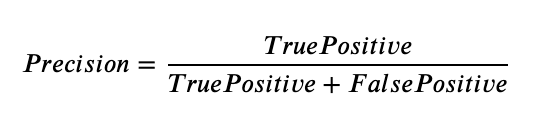

F-beta allows a balance between precision and recall. 
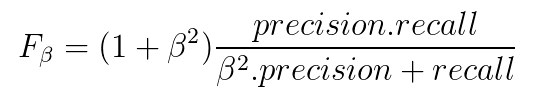

Since precision is more critical for this problem, a beta value of 0.5 is selected to give higher weightage to precision, thus focusing more on minimising false positives than minimising false negatives.  

### Develop Ensemble Models

To compare the various ensemble learning methods, we would use Decision Tree Classifier with max depth 2 as the base estimator for fair comparison. For stacking, we would add Naive Bayes and Logistic Regression Classifiers to the Decision Tree Classifier.

#### Create F-beta scorer for GridSearchCV
Since we would like to maximise F-beta score, a F-beta scorer has been developed to be used with GridSearchCV.

In [29]:
from sklearn.metrics import make_scorer

# create function to return max F-beta score
def fbeta_custom(y_test, y_pred_proba):
    fbeta = []
    for i in threshold:
        y_pred = np.where(y_pred_proba[:]>i, 1, 0)
        score = fbeta_score(y_test,y_pred,beta=beta)
        if i==threshold[0]:
            thresholdSelected = i
        elif score>max(fbeta):
            thresholdSelected = i
        fbeta.append(score)
    y_pred = np.where(y_pred_proba[:]>thresholdSelected, 1, 0)
    return fbeta_score(y_test,y_pred,beta=beta)

# F-beta scorer for use in GridSearchCV
fbeta_scorer = make_scorer(fbeta_custom, needs_proba=True, greater_is_better=True)

#### Bagging Model

--------------------------------------------------
Bagging Model
--------------------------------------------------
Base Classifier: DecisionTreeClassifier(max_depth=2)
Parameter Settings: {'max_samples': 0.1, 'n_estimators': 15}
Select threshold of 0.22 for bagging model to maximise F-beta score
Precision: 0.69
Recall: 0.49
Chosen beta: 0.5
F-beta: 0.64
AUC under ROC: 0.74


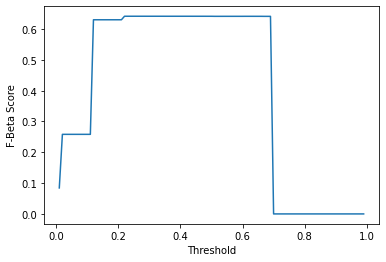

In [30]:
# Bagging Model

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# perform GridSearchCV to optimise bagging model and perform prediction
parameters = {'max_samples': [0.1,0.3,0.5],
             'n_estimators': [5,10,15]}
bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth=2)), param_grid=parameters, n_jobs=-1, scoring=fbeta_scorer)
bag.fit(X_train, y_train)
y_pred_proba = bag.predict_proba(X_test)

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Bagging Model")
print("-"*50)
print(f"Base Classifier: DecisionTreeClassifier(max_depth=2)")
print(f"Parameter Settings: {bag.best_params_}") #depth 3 and 0.3
print(f"Select threshold of {thresholdSelected} for bagging model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Boosting Model

--------------------------------------------------
Boosting Model
--------------------------------------------------
Base Classifier: DecisionTreeClassifier(max_depth=2)
Parameter Settings: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 15}
Select threshold of 0.51 for boosting model to maximise F-beta score
Precision: 0.79
Recall: 0.57
Chosen beta: 0.5
F-beta: 0.73
AUC under ROC: 0.78


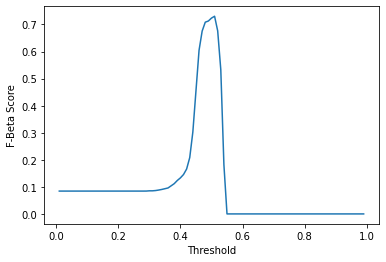

In [31]:
# Boosting Model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# perform GridSearchCV to optimise boosting model and perform prediction
parameters = {'algorithm': ['SAMME', 'SAMME.R'],
             'n_estimators': [5,10,15],
             'learning_rate': [0.01,0.1,1]}
ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid=parameters, n_jobs=-1, scoring=fbeta_scorer)
ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=0.5)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Boosting Model")
print("-"*50)
print(f"Base Classifier: DecisionTreeClassifier(max_depth=2)")
print(f"Parameter Settings: {ada.best_params_}") 
print(f"Select threshold of {thresholdSelected} for boosting model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Stacking Model

--------------------------------------------------
Stacking Model
--------------------------------------------------
Base Classifiers and Parameter Settings: [('dt', DecisionTreeClassifier(max_depth=2)), ('nb', GaussianNB()), ('lr', LogisticRegression(C=0.001))]
Select threshold of 0.15 for stacking model to maximise F-beta score
Precision: 0.70
Recall: 0.53
Chosen beta: 0.5
F-beta: 0.66
AUC under ROC: 0.76


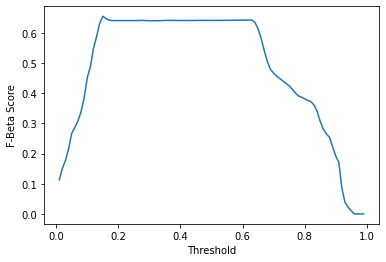

In [32]:
# Stacking Model
from sklearn.ensemble import StackingClassifier

# Create stacking model using Decision Tree and Naive Bayes classifiers
estimators = [('dt',DecisionTreeClassifier(max_depth=2)), ('nb', GaussianNB()), ('lr', LogisticRegression(C=0.001))]
stack = StackingClassifier(estimators=estimators, n_jobs=-1)
stack.fit(X_train, y_train)
y_pred_proba = stack.predict_proba(X_test)
    
# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Stacking Model")
print("-"*50)
print(f"Base Classifiers and Parameter Settings: {estimators}")
print(f"Select threshold of {thresholdSelected} for stacking model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Comparing performance of the three ensemble models

The Boosting model outperformed Bagging model in all the given metrics. This could be due to a limitation of Bagging in that every example has equal chance to be sampled, regardless of the difficulty of classifying the example. Boosting, on the other hand, will increase the weight of example that is wrongly classified, so that it is more likely to be chosen again for subsequent models so as to focus on to the more difficult examples.  

Stacking also performed better than Bagging in all the given metrics. This could be due to another limitation of Bagging in that it assigns equal weight to all models, regardless of accuracy. Stacking, on the other hand, uses another machine learning model, Logistic Regression in this case, to combine the results of models with higher weightage for the more accurate model. 

Boosting performed better than Stacking as well. This could be due to the Boosting model iteratively adjusting the training dataset to account for the strengths and weaknesses of the current essemble model when fitting the next base model. Conversely, Stacking tries to adapt the weightage of the respective models to improve the performance.  

### Develop Ensemble Models with Feature Engineering

getting external data<br/>
https://www.irs.gov/pub/irs-soi/16zpallagi.csv<br/>
more details:<br/>
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi

In [33]:
f = open('16zpallagi.csv', 'r')
f.readline()
count = {}
for l in f.readlines():
    s = l.split(',')
    if s[2] == '0':
        count[s[1], int(s[3])] = int(s[4])
    else:
        count['%05d' % int(s[2]), int(s[3])] = int(s[4])
agg_count = {}
for k, v in count.items():
    if k[0][:3] not in agg_count:
        agg_count[k[0][:3]] = [0] * 7
    agg_count[k[0][:3]][k[1]] += v
f.close()

In [34]:
# Assume incomes bracketed are [12500, 37500, 62500, 87500, 150000, 400000]
# 1 = $1 under $25,000
# 2 = $25,000 under $50,000
# 3 = $50,000 under $75,000
# 4 = $75,000 under $100,000
# 5 = $100,000 under $200,000
# 6 = $200,000 or more

bracket_income = [0, 12500, 37500, 62500, 87500, 150000, 400000]
estimated_zip_income = {}
for k, v in agg_count.items():
    sumn, sumd = 0, 0
    for i in range(1, 7):
        sumn += bracket_income[i] * v[i]
        sumd += v[i]
    estimated_zip_income[k] = sumn / sumd

In [35]:
approved.insert(4, 'estimated_income', approved[['zip3', 'state']].apply(lambda x: estimated_zip_income[x[0]] if x[0] in estimated_zip_income else estimated_zip_income[x[1]] if x[1] in estimated_zip_income else 0, axis = 1))
rejected.insert(4, 'estimated_income', rejected[['zip3', 'state']].apply(lambda x: estimated_zip_income[x[0]] if x[0] in estimated_zip_income else estimated_zip_income[x[1]] if x[1] in estimated_zip_income else 0, axis = 1))
data_pos = approved.drop(['zip3', 'state'], axis = 1).values
data_neg = rejected.drop(['zip3', 'state'], axis = 1).values

In [36]:
#combine both approved and rejected data
data = np.concatenate((data_pos, data_neg), axis=0)

#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], stratify=data[:,-1], random_state=88)

# scale loan amount and employment length
mms = MinMaxScaler()
X_train[:,[0,2,3]] = mms.fit_transform(X_train[:,[0,2,3]])
X_test[:,[0,2,3]] = mms.transform(X_test[:,[0,2,3]])

#### Bagging Model

--------------------------------------------------
Bagging Model
--------------------------------------------------
Base Classifier: DecisionTreeClassifier(max_depth=2)
Parameter Settings: {'max_samples': 0.1, 'n_estimators': 15}
Select threshold of 0.68 for bagging model to maximise F-beta score
Precision: 0.71
Recall: 0.47
Chosen beta: 0.5
F-beta: 0.65
AUC under ROC: 0.73


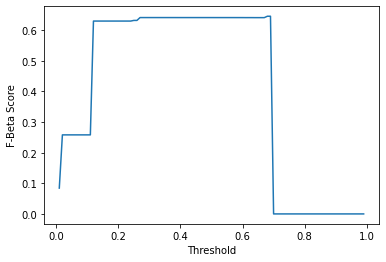

In [37]:
# Bagging Model

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# perform GridSearchCV to optimise bagging model and perform prediction
parameters = {'max_samples': [0.1,0.3,0.5],
             'n_estimators': [5,10,15]}
bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth=2)), param_grid=parameters, n_jobs=-1, scoring=fbeta_scorer)
bag.fit(X_train, y_train)
y_pred_proba = bag.predict_proba(X_test)

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Bagging Model")
print("-"*50)
print(f"Base Classifier: DecisionTreeClassifier(max_depth=2)")
print(f"Parameter Settings: {bag.best_params_}") #depth 3 and 0.3
print(f"Select threshold of {thresholdSelected} for bagging model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Boosting Model

--------------------------------------------------
Boosting Model
--------------------------------------------------
Base Classifier: DecisionTreeClassifier(max_depth=2)
Parameter Settings: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 15}
Select threshold of 0.51 for boosting model to maximise F-beta score
Precision: 0.78
Recall: 0.59
Chosen beta: 0.5
F-beta: 0.73
AUC under ROC: 0.79


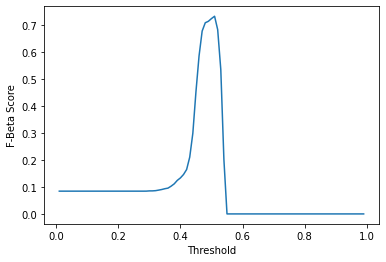

In [38]:
# Boosting Model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# perform GridSearchCV to optimise boosting model and perform prediction
parameters = {'algorithm': ['SAMME', 'SAMME.R'],
             'n_estimators': [5,10,15],
             'learning_rate': [0.01,0.1,1]}
ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid=parameters, n_jobs=-1, scoring=fbeta_scorer)
ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)

# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=0.5)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Boosting Model")
print("-"*50)
print(f"Base Classifier: DecisionTreeClassifier(max_depth=2)")
print(f"Parameter Settings: {ada.best_params_}") 
print(f"Select threshold of {thresholdSelected} for boosting model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Stacking Model

--------------------------------------------------
Stacking Model
--------------------------------------------------
Base Classifiers and Parameter Settings: [('dt', DecisionTreeClassifier(max_depth=2)), ('nb', GaussianNB()), ('lr', LogisticRegression(C=0.001))]
Select threshold of 0.15 for stacking model to maximise F-beta score
Precision: 0.69
Recall: 0.53
Chosen beta: 0.5
F-beta: 0.66
AUC under ROC: 0.76


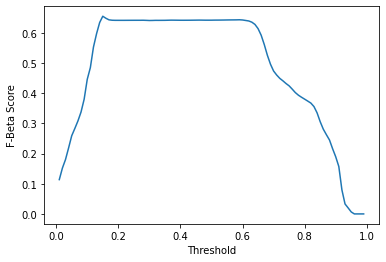

In [39]:
# Stacking Model
from sklearn.ensemble import StackingClassifier

# Create stacking model using Decision Tree and Naive Bayes classifiers
estimators = [('dt',DecisionTreeClassifier(max_depth=2)), ('nb', GaussianNB()), ('lr', LogisticRegression(C=0.001))]
stack = StackingClassifier(estimators=estimators, n_jobs=-1)
stack.fit(X_train, y_train)
y_pred_proba = stack.predict_proba(X_test)
    
# compute F-beta score as threshold varies
fbeta = []
for i in threshold:
    y_pred = np.where(y_pred_proba[:,1]>i, 1, 0)
    score = fbeta_score(y_test,y_pred,beta=beta)
    if i==threshold[0]:
        thresholdSelected = i
    elif score>max(fbeta):
        thresholdSelected = i
    fbeta.append(score)

# plot change in F-beta score as threshold varies
plt.plot(threshold,fbeta)
plt.ylabel('F-Beta Score')
plt.xlabel('Threshold')

# compute scores for threshold selected
y_pred = np.where(y_pred_proba[:,1]>thresholdSelected, 1, 0)
print("-"*50)
print("Stacking Model")
print("-"*50)
print(f"Base Classifiers and Parameter Settings: {estimators}")
print(f"Select threshold of {thresholdSelected} for stacking model to maximise F-beta score")
print(f"Precision: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"Chosen beta: {beta}")
print(f"F-beta: {fbeta_score(y_test,y_pred,beta=beta):.2f}")
print(f"AUC under ROC: {roc_auc_score(y_test,y_pred):.2f}")

#### Comparing performance of the three ensemble models

While there is a very slight improvement in F-beta score for bagging model, there is no significant improvement observed in the overall results for the ensemble models after adding new information in the form of estimated income. This could be attributed to the following possible reasons. 

As ensemble models already have improved performance, further improvement from feature engineering might not be as significant. 

The estimated income is based on data aggregated at county level, which might not be useful considering the high variance of income brackets across the towns for each country and each town might have further variance. As seen below, the distribution of estimated income for both approved and rejected cases are rather similar as well and might limit the usefulness as a feature.   


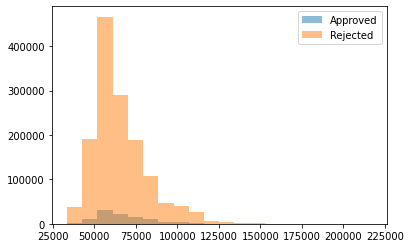

In [40]:
plt.hist(approved['estimated_income'], bins=20, label='Approved', alpha=0.5)
plt.hist(rejected['estimated_income'], bins=20, label='Rejected', alpha=0.5)
plt.legend()
plt.show()

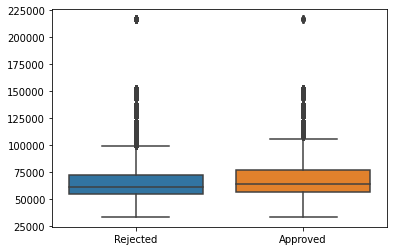

In [41]:
import seaborn as sns

sns.boxplot(data=[rejected['estimated_income'],approved['estimated_income']])
plt.xticks(ticks=[0,1],labels=['Rejected','Approved'])
plt.show()